# Imports

In [41]:
import itertools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Social variables

In [42]:
df = pd.read_csv("../data/polisci/politicalshutdowns_whoshutsdata_2018_2021.csv")

In [43]:
df.head()

,Country.Code,year,totalshutdowns,nationalshutdowns,politicalshutdowns,nationalpoliticalshutdowns,country,FDI,GDP,oilreserves_bbl,...,nationalnonpoliticalshutdowns,nonpoliticalshutdowns,shutdownind,national_shutdownind,regional_shutdownind,nationalpolitical_shutdownind,regionalpolitical_shutdownind,political_shutdownind,nonpolitical_shutdownind,nationalnonpolitical_shutdownind
0,ABW,2019,3,3,0,0,Aruba,-7.522654e+07,3.368970e+09,NaN,...,3,3,True,True,False,False,False,False,True,True
1,ABW,2020,1,1,0,0,Aruba,1.640876e+08,2.610039e+09,NaN,...,1,1,True,True,False,False,False,False,True,True
2,AFG,2019,3,3,0,0,Afghanistan,2.340455e+07,1.890449e+10,NaN,...,3,3,True,True,False,False,False,False,True,True
3,AFG,2020,3,3,0,0,Afghanistan,1.297015e+07,2.014344e+10,NaN,...,3,3,True,True,False,False,False,False,True,True
4,AFG,2021,4,1,1,0,Afghanistan,2.060098e+07,1.478686e+10,NaN,...,1,3,True,True,True,False,True,True,True,True


# libdemocracy

shutdowns 0.151
outages 0.279
neither 0.465


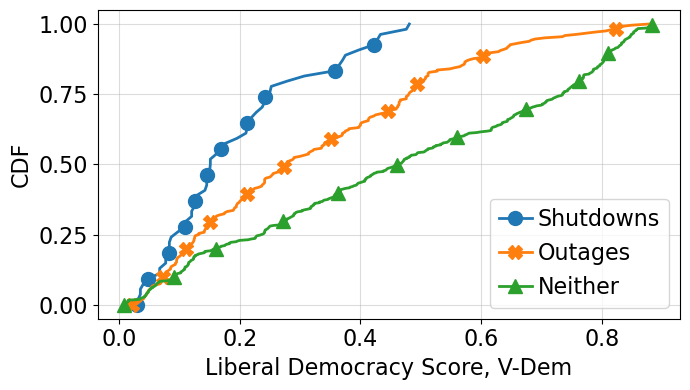

In [69]:
fig, ax = plt.subplots(1, figsize=(7, 4), sharex=True, sharey=True)

ax.yaxis.grid(True, linestyle='-', color='#bababa', alpha=0.5, which='both')
ax.xaxis.grid(True, linestyle='-', color='#bababa', alpha=0.5, which='both')

fontsize = 16

m = itertools.cycle(["o", "X", "^", "s"])

# ecdf1 <- ecdf(all_shutdown_politics$v2x_libdem[all_shutdown_politics$nationalpolitical_shutdownind==1])
x = df.loc[(df["nationalpolitical_shutdownind"] == 1) & (~df["v2x_libdem"].isnull())]["v2x_libdem"]
print("shutdowns",np.median(x))
ax.plot(
    np.sort(x),
    np.linspace(0, 1, len(x)),
    label="Shutdowns",
    marker=next(m),
    markevery = int(len(x) / 10),
    lw=2,
    markersize=10
)



# ecdf2 <- ecdf(all_shutdown_politics$v2x_libdem[all_shutdown_politics$nationalnonpolitical_shutdownind==1])
x = df.loc[(df["nationalnonpolitical_shutdownind"] == 1) & (~df["v2x_libdem"].isnull())]["v2x_libdem"]
print("outages",np.median(x))
ax.plot(
    np.sort(x),
    np.linspace(0, 1, len(x)),
    label="Outages",
    marker=next(m),
    markevery = int(len(x) / 10),
    lw=2,
    markersize=10
)

# ecdf3 <- ecdf(all_shutdown_politics$v2x_libdem[all_shutdown_politics$nationalnonpolitical_shutdownind!=1 & all_shutdown_politics$nationalpolitical_shutdownind!=1])
x = df.loc[(df["nationalnonpolitical_shutdownind"] != 1) 
           & (df["nationalpolitical_shutdownind"] != 1)
           & (~df["v2x_libdem"].isnull())]["v2x_libdem"]
print("neither",np.median(x))
ax.plot(
    np.sort(x),
    np.linspace(0, 1, len(x)),
    label="Neither",
    marker=next(m),
    markevery = int(len(x) / 10),
    lw=2,
    markersize=10
)

# ax.set_title(v, fontsize=20)

ax.tick_params(labelsize=fontsize)

ax.set_xlabel("Liberal Democracy Score, V-Dem", fontsize=fontsize)
ax.set_ylabel("CDF", fontsize=fontsize)

ax.set_yticks(np.arange(0, 1.01, 0.25))

ax.legend(loc='lower right', ncol=1,
              frameon=True, fontsize=fontsize, handletextpad=0.25, columnspacing=0.5, 
              handlelength=1.5)


# ax.set_xlim(0, 0.1)

fig.subplots_adjust(hspace=0)
fig.tight_layout()
fig.savefig("../figures/polisci_analysis_libdem.pdf")

In [60]:
x = df.loc[(df["nationalpolitical_shutdownind"] == 1) & (~df["v2x_libdem"].isnull())]["v2x_libdem"]
max(x)

0.481

# v2regoppgroups_5

shutdown 0.333
outage 0.25
neither 0.0


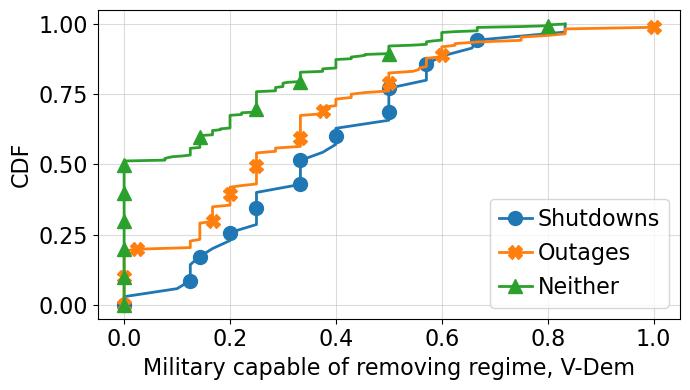

In [70]:
fig, ax = plt.subplots(1, figsize=(7, 4), sharex=True, sharey=True)

ax.yaxis.grid(True, linestyle='-', color='#bababa', alpha=0.5, which='both')
ax.xaxis.grid(True, linestyle='-', color='#bababa', alpha=0.5, which='both')

m = itertools.cycle(["o", "X", "^", "s"])

# ecdf1 <- ecdf(all_shutdown_politics$v2x_libdem[all_shutdown_politics$nationalpolitical_shutdownind==1])
x = df.loc[(df["nationalpolitical_shutdownind"] == 1) & (~df["v2regoppgroups_5"].isnull())]["v2regoppgroups_5"]
print("shutdown",np.median(x))
ax.plot(
    np.sort(x),
    np.linspace(0, 1, len(x)),
    label="Shutdowns",
    marker=next(m),
    markevery = int(len(x) / 10),
    lw=2,
    markersize=10
)


# ecdf2 <- ecdf(all_shutdown_politics$v2x_libdem[all_shutdown_politics$nationalnonpolitical_shutdownind==1])
x = df.loc[(df["nationalnonpolitical_shutdownind"] == 1) & (~df["v2regoppgroups_5"].isnull())]["v2regoppgroups_5"]
print("outage",np.median(x))
ax.plot(
    np.sort(x),
    np.linspace(0, 1, len(x)),
    label="Outages",
    marker=next(m),
    markevery = int(len(x) / 10),
    lw=2,
    markersize=10
)

# ecdf3 <- ecdf(all_shutdown_politics$v2x_libdem[all_shutdown_politics$nationalnonpolitical_shutdownind!=1 & all_shutdown_politics$nationalpolitical_shutdownind!=1])
x = df.loc[(df["nationalnonpolitical_shutdownind"] != 1) 
           & (df["nationalpolitical_shutdownind"] != 1)
           & (~df["v2regoppgroups_5"].isnull())]["v2regoppgroups_5"]
print("neither",np.median(x))
ax.plot(
    np.sort(x),
    np.linspace(0, 1, len(x)),
    label="Neither",
    marker=next(m),
    markevery = int(len(x) / 10),
    lw=2,
    markersize=10
)

# ax.set_title(v, fontsize=20)

ax.tick_params(labelsize=fontsize)

ax.set_xlabel("Military capable of removing regime, V-Dem", fontsize=fontsize)
ax.set_ylabel("CDF", fontsize=fontsize)

ax.set_yticks(np.arange(0, 1.01, 0.25))

ax.legend(loc='lower right', ncol=1,
              frameon=True, fontsize=fontsize, handletextpad=0.25, columnspacing=0.5, 
              handlelength=1.5)


# ax.set_xlim(0, 0.1)

fig.subplots_adjust(hspace=0)
fig.tight_layout()
fig.savefig("../figures/polisci_analysis_military.pdf",bbox_inches="tight")

# Media

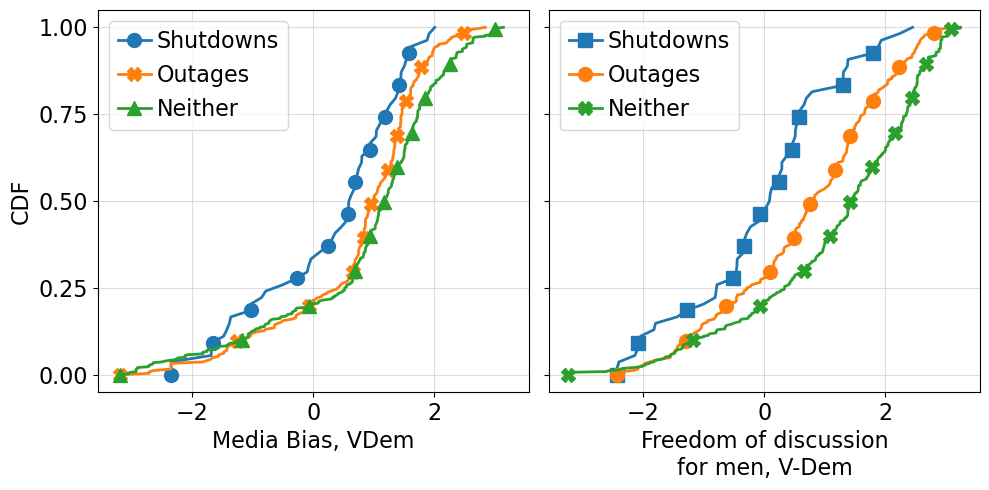

In [71]:
fig, _ax = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)


m = itertools.cycle(["o", "X", "^", "s"])

####

ax = _ax[0]


x = df.loc[(df["nationalpolitical_shutdownind"] == 1) & (~df["v2mebias"].isnull())]["v2mebias"]

ax.plot(
    np.sort(x),
    np.linspace(0, 1, len(x)),
    label="Shutdowns",
    marker=next(m),
    markevery = int(len(x) / 10),
    lw=2,
    markersize=10
)

x = df.loc[(df["nationalnonpolitical_shutdownind"] == 1) & (~df["v2mebias"].isnull())]["v2mebias"]

ax.plot(
    np.sort(x),
    np.linspace(0, 1, len(x)),
    label="Outages",
    marker=next(m),
    markevery = int(len(x) / 10),
    lw=2,
    markersize=10
)

x = df.loc[(df["nationalnonpolitical_shutdownind"] != 1) 
           & (df["nationalpolitical_shutdownind"] != 1)
           & (~df["v2mebias"].isnull())]["v2mebias"]

ax.plot(
    np.sort(x),
    np.linspace(0, 1, len(x)),
    label="Neither",
    marker=next(m),
    markevery = int(len(x) / 10),
    lw=2,
    markersize=10
)

ax.yaxis.grid(True, linestyle='-', color='#bababa', alpha=0.5, which='both')
ax.xaxis.grid(True, linestyle='-', color='#bababa', alpha=0.5, which='both')


ax.tick_params(labelsize=fontsize)

ax.set_xlabel("Media Bias, VDem", fontsize=fontsize)
ax.set_ylabel("CDF", fontsize=fontsize)

ax.set_yticks(np.arange(0, 1.01, 0.25))

ax.legend(loc='upper left', ncol=1,
              frameon=True, fontsize=fontsize, handletextpad=0.25, columnspacing=0.5, 
              handlelength=1.5)

####

ax = _ax[1]

x = df.loc[(df["nationalpolitical_shutdownind"] == 1) & (~df["v2cldiscm"].isnull())]["v2cldiscm"]

ax.plot(
    np.sort(x) ,
    np.linspace(0, 1, len(x)),
    label="Shutdowns",
    marker=next(m),
    markevery = int(len(x) / 10),
    lw=2,
    markersize=10
)

x = df.loc[(df["nationalnonpolitical_shutdownind"] == 1) & (~df["v2cldiscm"].isnull())]["v2cldiscm"]

ax.plot(
    np.sort(x),
    np.linspace(0, 1, len(x)),
    label="Outages",
    marker=next(m),
    markevery = int(len(x) / 10),
    lw=2,
    markersize=10
)

x = df.loc[(df["nationalnonpolitical_shutdownind"] != 1) 
           & (df["nationalpolitical_shutdownind"] != 1)
           & (~df["v2cldiscm"].isnull())]["v2cldiscm"]
ax.plot(
    np.sort(x),
    np.linspace(0, 1, len(x)),
    label="Neither",
    marker=next(m),
    markevery = int(len(x) / 10),
    lw=2,
    markersize=10
)

ax.yaxis.grid(True, linestyle='-', color='#bababa', alpha=0.5, which='both')
ax.xaxis.grid(True, linestyle='-', color='#bababa', alpha=0.5, which='both')


# ax.set_title(v, fontsize=20)

ax.tick_params(labelsize=fontsize)

ax.set_xlabel("Freedom of discussion\nfor men, V-Dem", fontsize=fontsize)
# ax.set_ylabel("CDF", fontsize=20)

ax.set_yticks(np.arange(0, 1.01, 0.25))

ax.legend(loc='upper left', ncol=1,
              frameon=True, fontsize=fontsize, handletextpad=0.25, columnspacing=0.5, 
              handlelength=1.5)

        
fig.subplots_adjust(hspace=10)
fig.tight_layout()
fig.savefig("../figures/polisci_analysis_media.pdf",bbox_inches='tight')

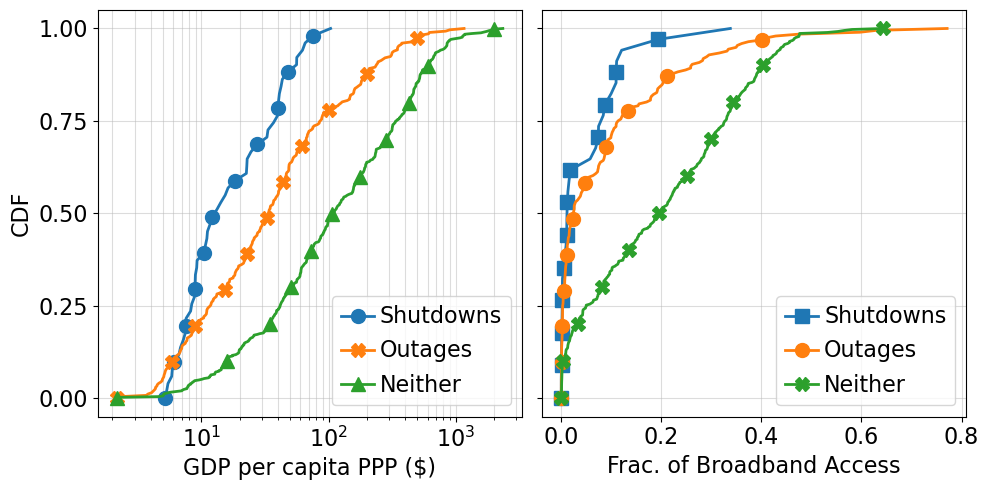

In [73]:
fig, _ax = plt.subplots(1, 2, figsize=(10, 5), sharex=False, sharey=True)


m = itertools.cycle(["o", "X", "^", "s"])

####

ax = _ax[0]


x = df.loc[(df["nationalpolitical_shutdownind"] == 1) & (~df["GDP_capita"].isnull())]["GDP_capita"]

ax.plot(
    np.sort(x) / 100,
    np.linspace(0, 1, len(x)),
    label="Shutdowns",
    marker=next(m),
    markevery = int(len(x) / 10),
    lw=2,
    markersize=10
)

x = df.loc[(df["nationalnonpolitical_shutdownind"] == 1) & (~df["GDP_capita"].isnull())]["GDP_capita"]

ax.plot(
    np.sort(x) / 100,
    np.linspace(0, 1, len(x)),
    label="Outages",
    marker=next(m),
    markevery = int(len(x) / 10),
    lw=2,
    markersize=10
)

x = df.loc[(df["nationalnonpolitical_shutdownind"] != 1) 
           & (df["nationalpolitical_shutdownind"] != 1)
           & (~df["GDP_capita"].isnull())]["GDP_capita"]

ax.plot(
    np.sort(x) / 100,
    np.linspace(0, 1, len(x)),
    label="Neither",
    marker=next(m),
    markevery = int(len(x) / 10),
    lw=2,
    markersize=10
)

ax.yaxis.grid(True, linestyle='-', color='#bababa', alpha=0.5, which='both')
ax.xaxis.grid(True, linestyle='-', color='#bababa', alpha=0.5, which='both')


ax.tick_params(labelsize=fontsize)

ax.set_xlabel("GDP per capita PPP ($)", fontsize=fontsize)
ax.set_ylabel("CDF", fontsize=fontsize)

ax.set_yticks(np.arange(0, 1.01, 0.25))

ax.legend(loc='lower right', ncol=1,
              frameon=True, fontsize=fontsize, handletextpad=0.25, columnspacing=0.5, 
              handlelength=1.5)

ax.set_xscale('log')

####

ax = _ax[1]

x = df.loc[(df["nationalpolitical_shutdownind"] == 1) & (~df["broadband"].isnull())]["broadband"]

ax.plot(
    np.sort(x)  / 100,
    np.linspace(0, 1, len(x)),
    label="Shutdowns",
    marker=next(m),
    markevery = int(len(x) / 10),
    lw=2,
    markersize=10
)

x = df.loc[(df["nationalnonpolitical_shutdownind"] == 1) & (~df["broadband"].isnull())]["broadband"]

ax.plot(
    np.sort(x) / 100,
    np.linspace(0, 1, len(x)),
    label="Outages",
    marker=next(m),
    markevery = int(len(x) / 10),
    lw=2,
    markersize=10
)

x = df.loc[(df["nationalnonpolitical_shutdownind"] != 1) 
           & (df["nationalpolitical_shutdownind"] != 1)
           & (~df["broadband"].isnull())]["broadband"]
ax.plot(
    np.sort(x) / 100,
    np.linspace(0, 1, len(x)),
    label="Neither",
    marker=next(m),
    markevery = int(len(x) / 10),
    lw=2,
    markersize=10
)

ax.yaxis.grid(True, linestyle='-', color='#bababa', alpha=0.5, which='both')
ax.xaxis.grid(True, linestyle='-', color='#bababa', alpha=0.5, which='both')


# ax.set_title(v, fontsize=20)

ax.tick_params(labelsize=fontsize)

ax.set_xlabel("Frac. of Broadband Access", fontsize=fontsize)
# ax.set_ylabel("CDF", fontsize=20)

ax.set_yticks(np.arange(0, 1.01, 0.25))

ax.legend(loc='lower right', ncol=1,
              frameon=True, fontsize=fontsize, handletextpad=0.25, columnspacing=0.5, 
              handlelength=1.5)

        
fig.subplots_adjust(hspace=0)
fig.tight_layout()
fig.savefig("../figures/polisci_analysis_econ.pdf")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2b9a2535-ed0e-48ec-8277-3dc0993a1e10' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>